# Stoneburner, Kurt
- ## DSC 650 - Week 06
- ## Assignment 6.3 - Load the ResNet50 model. Perform image classification on five to ten images of your choice. 
- ## Use Selenium to download images of random animals for classification

I went with choosing 30 random animal images to classify. The code below performs a duckduckgo.com image search for "random animals" and returns links to 100 images. 30 links are randomly selected and classified. Selenium is used for the web scraping since duckduckgo.com uses Javascript to draw results interactively. I've been recently acquianted with Selenium for a work project where I need to scrape our company's website for content posted over a given quarter. I asked for access to the website backend database and was told we don't have that. Actual management of our web content is handled by a 3rd party who won't provide access. So I'm left with scraping our own content. Welcome to the backwards world of broadcast television.




Keras Offical Reference:
https://keras.io/api/applications/#classify-imagenet-classes-with-resnet50

Resnet Tutorial/Explainer:
https://am-nazerz.medium.com/transfer-learning-using-pre-trained-models-for-image-classification-resnet50-in-keras-e140892180d1

Headless Selenium: https://datarebellion.com/blog/using-headless-firefox-with-selenium-in-python/

Select Random Numbers: https://pynative.com/python-random-randrange/


In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

#//*** Display Images in Python
from IPython.display import Image,display
#Image(filename=img_path) 

#//*** These are needed for Selenium web scraping
import requests
import time
import random
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib.request

#//*** Initialize the Default Pretrained res50 Model
model = ResNet50(weights='imagenet')


def classify(input_img="temp.jpg"):
    
    #//*** Load Image From Disk and resize to 224x224
    img = image.load_img(input_img, target_size=(224, 224))
    
    #//*** Convert Image to array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #//*** Display Image in Juypter
    display(Image(filename=input_img))
    
    #//*** Perform prediction on image
    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])
    


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [2]:
#//*** URL to duckduckgo image search of random anumals
urlpage = "https://duckduckgo.com/?q=random+animals&t=ffab&iar=images&iax=images&ia=images"

#//*** Initialize Headless Firefox options 
options = webdriver.FirefoxOptions()
options.add_argument('-headless')

#//*** Full Browser Instance 
#driver = webdriver.Firefox()

#//*** Span Headless Instance
driver = webdriver.Firefox(options=options)


# get web page
driver.get(urlpage)
# execute script to scroll down the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
# sleep for 10s, to let everything load
time.sleep(10)

#//*** Presumably the page has loaded Images are associated with class="tile--img__img"
#//*** Get all DOM objects of class "tile--img__img" 
results = driver.find_elements(By.CLASS_NAME,"tile--img__img")



#//*** Select image_count number of random images from the 100(ish) results
image_count = 30

#//*** Initialize a dictionary to hold the results
image_dict = {}

#//*** Generate random indexes and add links to the dictionary
while len(image_dict.keys()) <= image_count:
    
    #//*** Get a random value between 0 and 99
    loop_random_value = random.randint(0, len(results)-1)

    #//*** Get the link associated with a random index in results
    link = results[loop_random_value].get_property('src')

    #//*** Using the random value as a key, add link to dictionary
    #//*** This will automatically deal with duplicates
    image_dict[loop_random_value] = link

#//*** Image List populated, close selenium browser
driver.close()


2 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.G-OJ62sOhr5UuQP5sJkX0gHaF7%26pid%3DApi&f=1


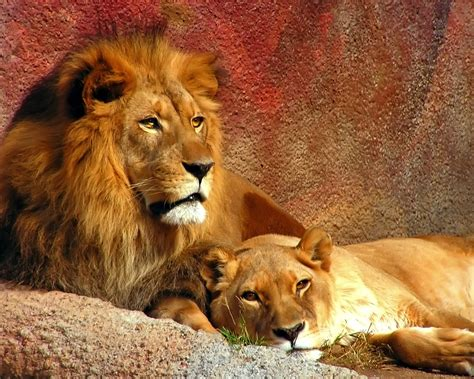

Predicted: [('n02129165', 'lion', 0.9955848), ('n02112137', 'chow', 0.0024367948), ('n02115641', 'dingo', 0.0004229943)]
62 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.YGpvSRSjaoJc0nZHeT8e5gHaJ4%26pid%3DApi&f=1


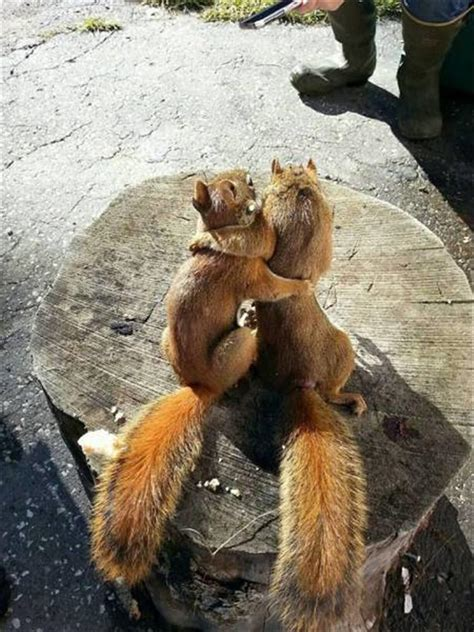

Predicted: [('n02132136', 'brown_bear', 0.37842244), ('n02096051', 'Airedale', 0.34660718), ('n02093991', 'Irish_terrier', 0.122344024)]
51 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.UWseSaDSAqU0nRFwnMVMbQHaG4%26pid%3DApi&f=1


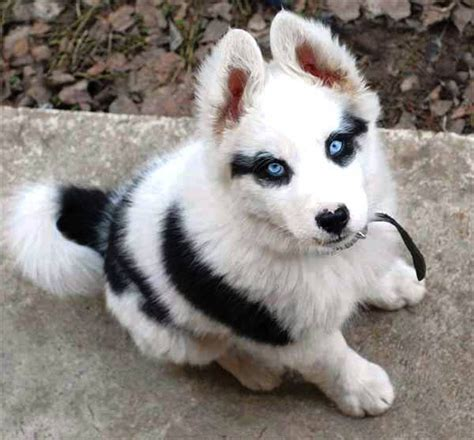

Predicted: [('n02113186', 'Cardigan', 0.25185075), ('n02113023', 'Pembroke', 0.15881422), ('n02109961', 'Eskimo_dog', 0.117357954)]
6 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.nuwdJqacLwjBMPU82V5U5gHaHa%26pid%3DApi&f=1


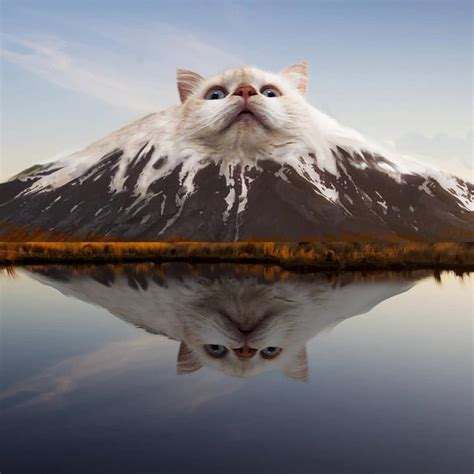

Predicted: [('n02123394', 'Persian_cat', 0.94403034), ('n09472597', 'volcano', 0.03822455), ('n03637318', 'lampshade', 0.0046584406)]
95 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP._oNqpOM1fwelMTPapKZnsQAAAA%26pid%3DApi&f=1


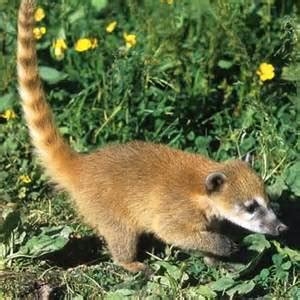

Predicted: [('n02137549', 'mongoose', 0.4505842), ('n02138441', 'meerkat', 0.1255783), ('n02441942', 'weasel', 0.0669025)]
93 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.KAwOT6Yl3M3d7fXXxMRdVQHaF7%26pid%3DApi&f=1


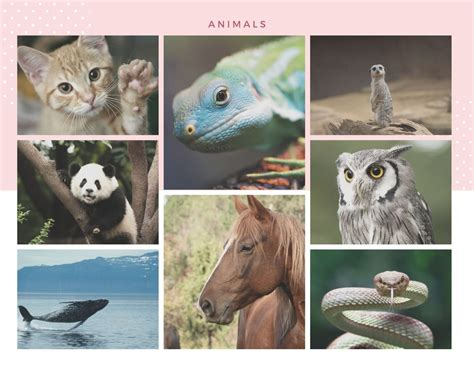

Predicted: [('n06359193', 'web_site', 0.85246474), ('n02114367', 'timber_wolf', 0.0123024015), ('n02105056', 'groenendael', 0.010377805)]
46 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.lX44CuArJUl91Q0v8aaxwgHaE7%26pid%3DApi&f=1


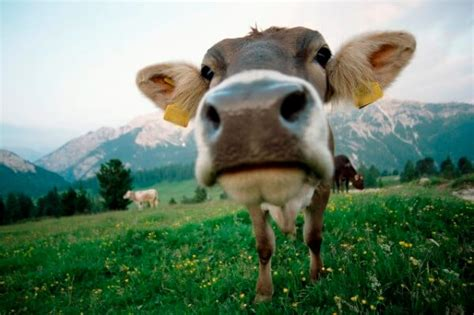

Predicted: [('n02415577', 'bighorn', 0.5363388), ('n02412080', 'ram', 0.3631934), ('n02437312', 'Arabian_camel', 0.03059867)]
13 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.Uf5TG1c6gXP23zTXhdFVXAHaHl%26pid%3DApi&f=1


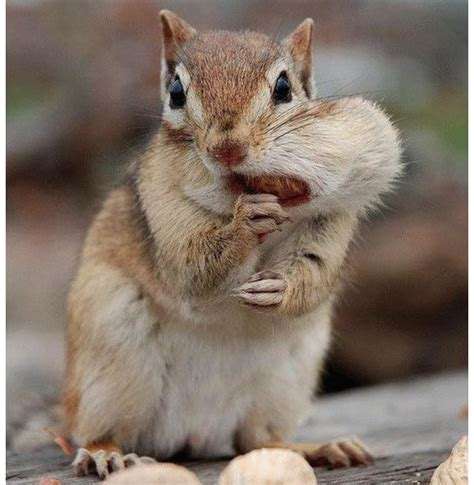

Predicted: [('n02356798', 'fox_squirrel', 0.35890138), ('n02325366', 'wood_rabbit', 0.1254828), ('n02326432', 'hare', 0.0714032)]
31 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.YLpxJRzRRCoF8U-qd4G57gHaFj%26pid%3DApi&f=1


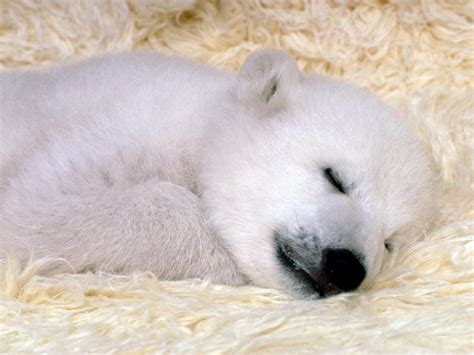

Predicted: [('n02111889', 'Samoyed', 0.53536), ('n02134084', 'ice_bear', 0.23472789), ('n02104029', 'kuvasz', 0.1057359)]
91 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.wwyq664DAhdPXkTpbsVOXwHaD5%26pid%3DApi&f=1


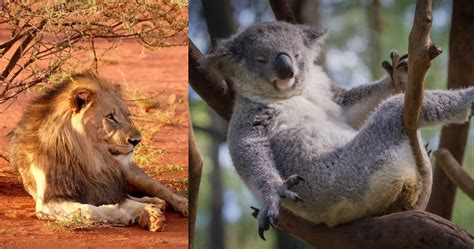

Predicted: [('n01882714', 'koala', 0.6319226), ('n02356798', 'fox_squirrel', 0.13771974), ('n01877812', 'wallaby', 0.12131584)]
14 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.fqu3C85Hf39hZApFr00P2QHaD4%26pid%3DApi&f=1


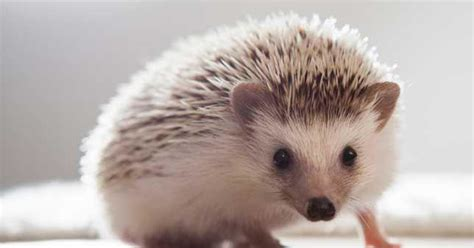

Predicted: [('n02346627', 'porcupine', 0.7363164), ('n02443484', 'black-footed_ferret', 0.039305497), ('n02442845', 'mink', 0.029366972)]
38 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.rmbIhHFW8jkhFRZrJDGlPgHaF_%26pid%3DApi&f=1


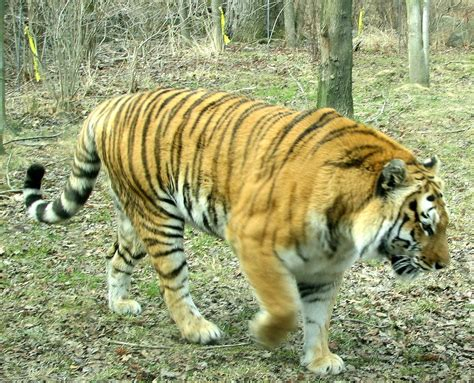

Predicted: [('n02129604', 'tiger', 0.9061147), ('n02123159', 'tiger_cat', 0.08988117), ('n02127052', 'lynx', 0.001530001)]
11 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.MYocoqSlwpjiC_Rvhc5XTgHaFS%26pid%3DApi&f=1


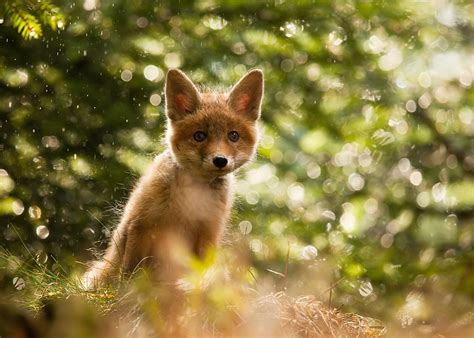

Predicted: [('n02114855', 'coyote', 0.9013533), ('n02115641', 'dingo', 0.03466273), ('n02114712', 'red_wolf', 0.021592606)]
24 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.0b6hmtxlmPBQw8leZBRUOQHaE8%26pid%3DApi&f=1


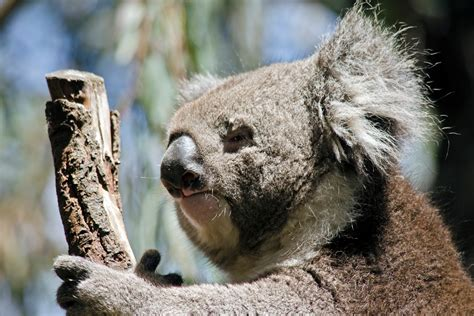

Predicted: [('n01882714', 'koala', 0.98254836), ('n02127052', 'lynx', 0.0051531885), ('n02497673', 'Madagascar_cat', 0.0020260247)]
68 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.5NZCBszDtlVdaFFPuEtaOAHaJ4%26pid%3DApi&f=1


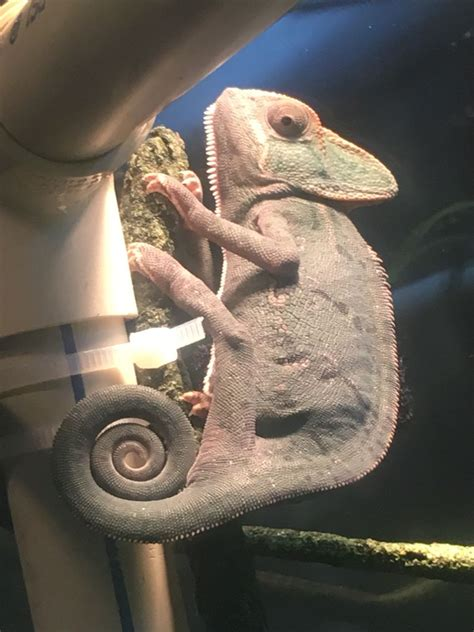

Predicted: [('n01694178', 'African_chameleon', 0.9940673), ('n01687978', 'agama', 0.0022742953), ('n01688243', 'frilled_lizard', 0.0020007796)]
58 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.j1xtfstpu6hO0_Uf6xtQQwHaGv%26pid%3DApi&f=1


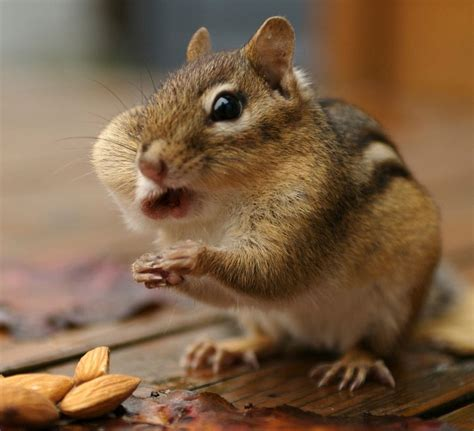

Predicted: [('n02356798', 'fox_squirrel', 0.60847485), ('n02326432', 'hare', 0.06756596), ('n02342885', 'hamster', 0.047325045)]
27 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.Vt6DXn-9mdT2fmV40M2RdQHaIr%26pid%3DApi&f=1


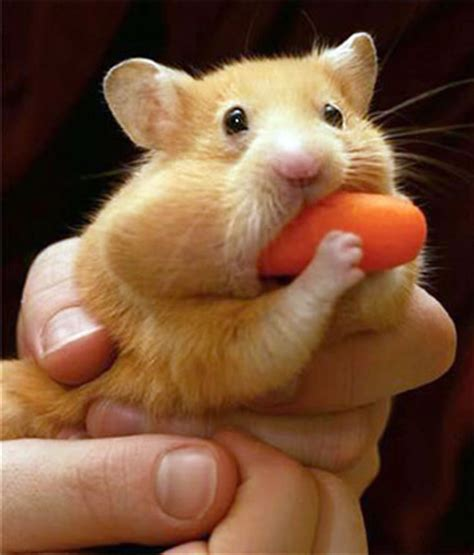

Predicted: [('n02342885', 'hamster', 0.98284), ('n02441942', 'weasel', 0.011438378), ('n02443484', 'black-footed_ferret', 0.004024127)]
60 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.2ggIXXx_5vhvH0hPnKm04QHaFR%26pid%3DApi&f=1


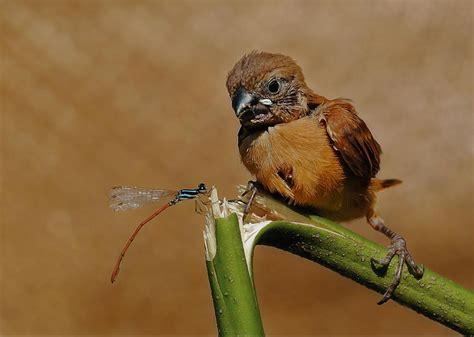

Predicted: [('n02177972', 'weevil', 0.5162185), ('n02259212', 'leafhopper', 0.12878722), ('n02206856', 'bee', 0.09496862)]
72 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.mGdVqkt6LtB6NHzhunNvFgHaKp%26pid%3DApi&f=1


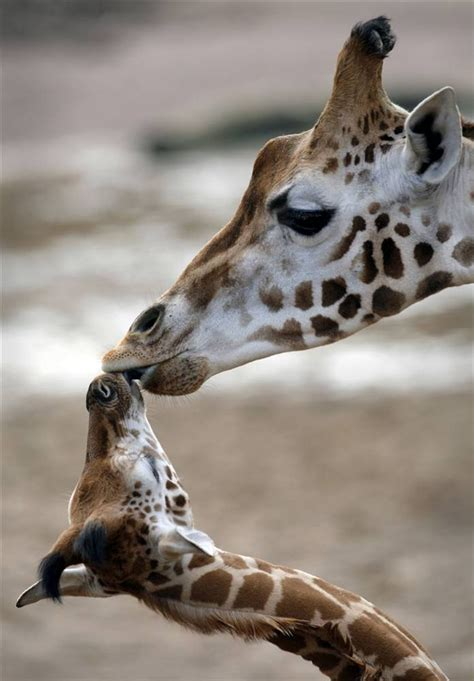

Predicted: [('n02027492', 'red-backed_sandpiper', 0.6217391), ('n02128925', 'jaguar', 0.120329216), ('n02025239', 'ruddy_turnstone', 0.09710668)]
45 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.glX4GA0PDkWdMMlt49OJmAHaFj%26pid%3DApi&f=1


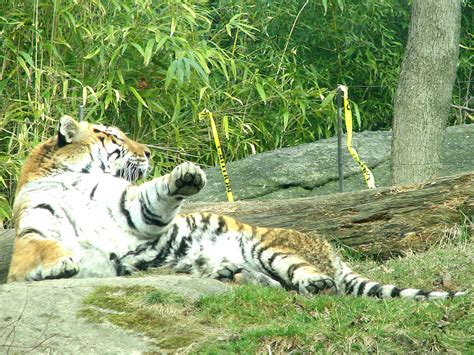

Predicted: [('n02129604', 'tiger', 0.9456286), ('n02123159', 'tiger_cat', 0.0428642), ('n02128925', 'jaguar', 0.009371509)]
66 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.s2__btIRXIsX4ZozY2h-qwHaFR%26pid%3DApi&f=1


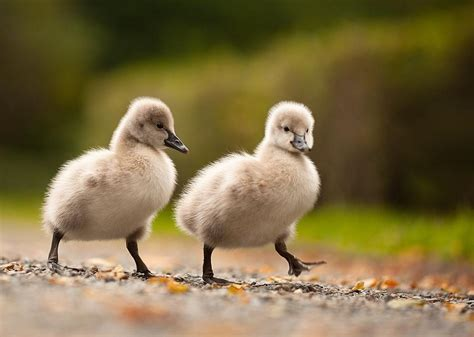

Predicted: [('n02113799', 'standard_poodle', 0.90532565), ('n02113712', 'miniature_poodle', 0.027295224), ('n01855672', 'goose', 0.016945565)]
35 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.whWKIgMBDqtWSESJ5hOuDQHaE8%26pid%3DApi&f=1


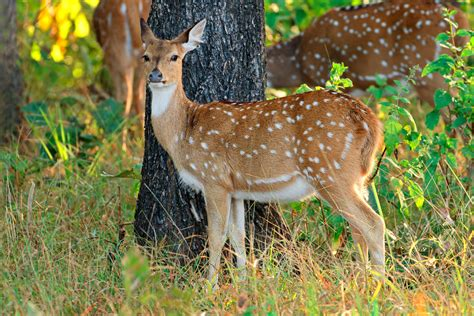

Predicted: [('n02422699', 'impala', 0.40252846), ('n02423022', 'gazelle', 0.20020951), ('n02115913', 'dhole', 0.1313775)]
94 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.Vdf46v7We9rDLunKvRwbfAHaEK%26pid%3DApi&f=1


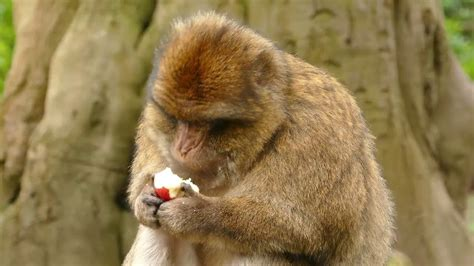

Predicted: [('n02487347', 'macaque', 0.91804904), ('n03404251', 'fur_coat', 0.015760032), ('n03045698', 'cloak', 0.010672248)]
19 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.oHCmzdeb5NU3FEz4g9SdygHaFA%26pid%3DApi&f=1


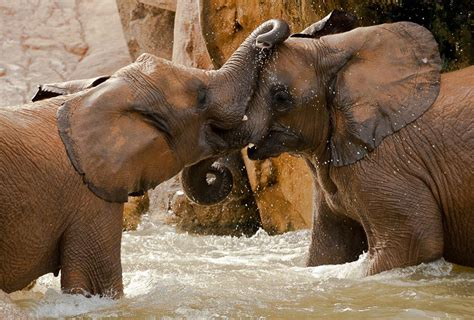

Predicted: [('n02504458', 'African_elephant', 0.8473944), ('n02504013', 'Indian_elephant', 0.14151447), ('n01871265', 'tusker', 0.011068763)]
30 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.QDpnsMU-myEi0NWUseYTlwHaHM%26pid%3DApi&f=1


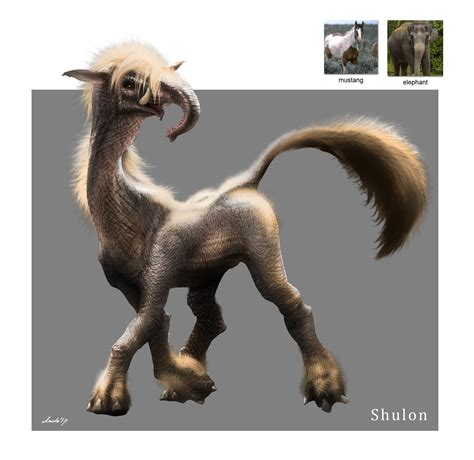

Predicted: [('n02483362', 'gibbon', 0.45324624), ('n02492035', 'capuchin', 0.08824503), ('n01616318', 'vulture', 0.08526346)]
69 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.ECTdVXm6_cEW37kdiEbiDAHaHQ%26pid%3DApi&f=1


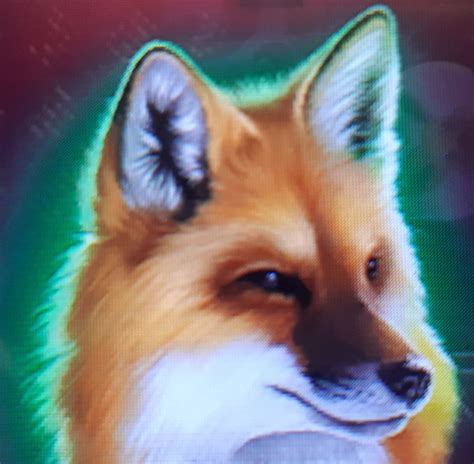

Predicted: [('n02112018', 'Pomeranian', 0.21891944), ('n02119022', 'red_fox', 0.19156507), ('n02342885', 'hamster', 0.10990433)]
81 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.JYyJYzplowX51YkdgQXh3gHaGp%26pid%3DApi&f=1


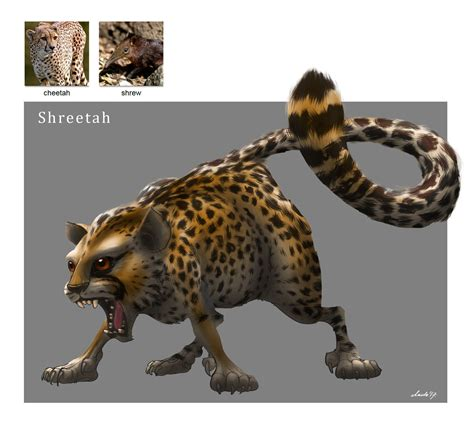

Predicted: [('n02128385', 'leopard', 0.3783161), ('n02128925', 'jaguar', 0.33610734), ('n02130308', 'cheetah', 0.07792824)]
7 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.ILY_MP1Iurd_CCjU9u7JcgHaEK%26pid%3DApi&f=1


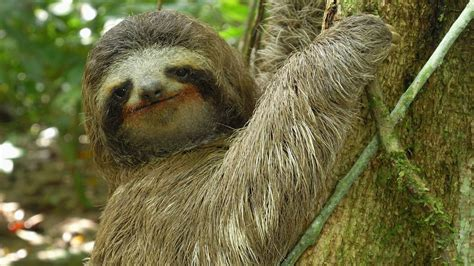

Predicted: [('n02457408', 'three-toed_sloth', 0.9999919), ('n02480495', 'orangutan', 4.5141846e-06), ('n02077923', 'sea_lion', 5.0567394e-07)]
12 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.k_Fsj_8Xw_EDf2yi3ejNWQHaFT%26pid%3DApi&f=1


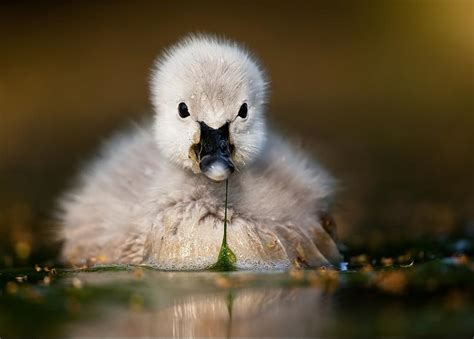

Predicted: [('n01855672', 'goose', 0.5497324), ('n02013706', 'limpkin', 0.055023566), ('n02018207', 'American_coot', 0.047573805)]
20 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.omByhapg5DUuQj4eyqJuuQHaJ4%26pid%3DApi&f=1


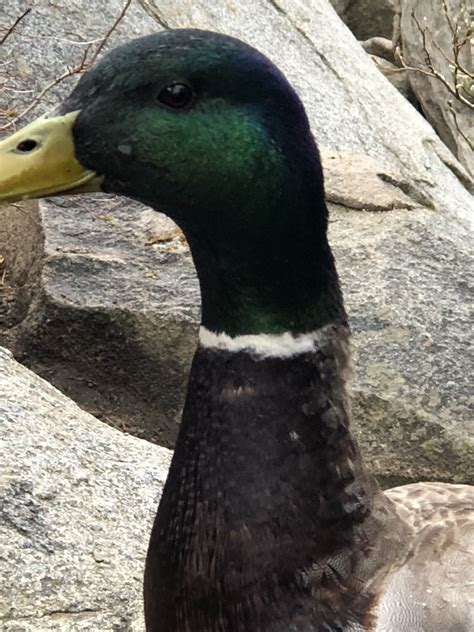

Predicted: [('n01847000', 'drake', 0.99143654), ('n01855672', 'goose', 0.0065209204), ('n02018207', 'American_coot', 0.0013205013)]
89 https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.3K2JbslR_qBysYebKiwk7gHaE8%26pid%3DApi&f=1


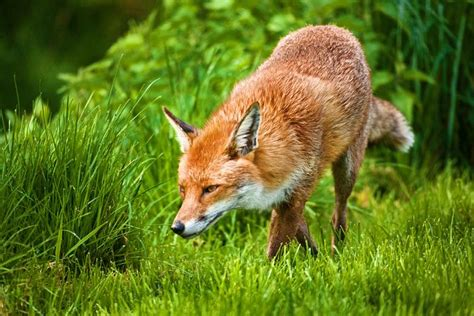

Predicted: [('n02119022', 'red_fox', 0.72474694), ('n02119789', 'kit_fox', 0.22774747), ('n02120505', 'grey_fox', 0.01409086)]


In [3]:
#//*** Download each link, write image to disk, then classify it.
#//*** Download, then Classify, should provide plenty of time to not spam the server.

for key,link in image_dict.items():
    print(key,link)
    
    #//*** Grab the image with urllib
    disp_img = urllib.request.urlopen(link).read()


    #//*** Write image to disk, the classifier is looking for UTF-8 encoded files by default
    #//*** This is a hack that works
    with open("temp.jpg", "wb") as binary_file:

        # Write bytes to file
        binary_file.write(disp_img)

    classify()
